<a href="https://colab.research.google.com/github/VanNguyenThiCam/LogisticRegression-/blob/main/Softmax_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras


#chuẩn bị data

from google.colab import drive #cách lấy dữ liệu trên google.colab 
drive.mount('/content/gdrive')

data = np.genfromtxt('/content/gdrive/MyDrive/Colab Notebooks/Data/iris_full_softmax.csv'
                      ,delimiter=',',skip_header = 1)

X = data[:,0:4]
y = data[:,4:]


print(X[:7])
print(y[:7])

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [11]:
#khởi tạo mô hình

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape = (4,)))
model.add(tf.keras.layers.Dense(units = 3))
model.add(keras.layers.Activation(keras.activations.softmax))

#model.add(tf.keras.layers.Dense(units = 3, activation = 'softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 3)                 15        
                                                                 
 activation_2 (Activation)   (None, 3)                 0         
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [12]:
#huấn luyện mô hình

model.compile(optimizer= 'sgd', loss = 'sparse_categorical_crossentropy')

batch_size = 32
epochs = 500
history = model.fit(X,y,batch_size,epochs)


Epoch 1/500
5/5 [==============================] - 0s 3ms/step - loss: 1.0294
Epoch 2/500
5/5 [==============================] - 0s 3ms/step - loss: 0.9279
Epoch 3/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8801
Epoch 4/500
5/5 [==============================] - 0s 4ms/step - loss: 0.8516
Epoch 5/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8290
Epoch 6/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8114
Epoch 7/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7942
Epoch 8/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7758
Epoch 9/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7613
Epoch 10/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7492
Epoch 11/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7349
Epoch 12/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7272
Epoch 13/500
5/5 [==============================] - 0s 2ms/st

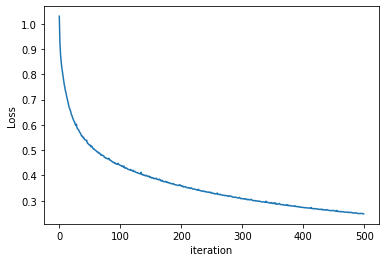

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.show()

In [20]:
preds = model(X)
preds = preds.numpy()
print(preds.shape)
print(y.shape)
y = y.reshape((150,))


(150, 3)
(150, 1)


In [23]:
predicted_class = np.argmax(preds, axis = 1)

print(predicted_class.shape)

(150,)


In [25]:
print(y.shape)

(150,)


In [26]:

acc = np.mean(predicted_class - y)
print(acc.mean())

0.02666666666666667
